### Simple Moving Average Indicator Using Machine Learning

Here is used the TCS.NS stock market dataset of TCS. In this prediction build some signal 1(Yes) and No(0) to buy the stock or not. So whenever SMA10 is greater than SMA50 it will noted into the signal value as 1 and if not the signal value will be 0. After that, we build new column named ‘Position’, so whenever the pattern change the direction, it will store the data into the columns.

In [1]:
# Import important liabraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

In [2]:
# Read datasets for both training and testing: 
df=pd.read_csv("C:/Users/admin/Downloads/TCS.NS.csv")

In [3]:
# Check the dataset shape
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-19,3030.000000,3099.000000,3005.000000,3050.199951,3017.639893,5776626
1,2021-03-22,3048.699951,3139.449951,3018.649902,3129.649902,3096.241455,2821646
2,2021-03-23,3140.000000,3169.000000,3122.850098,3142.600098,3109.053467,3305973
3,2021-03-24,3111.199951,3152.300049,3111.149902,3121.100098,3087.782959,2207104
4,2021-03-25,3112.199951,3130.850098,3050.000000,3064.850098,3032.133545,3179786


In [4]:
# Check datatypes for train data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [5]:
# Check for missing data:
print(df.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Set the date columns as the index
df = df.set_index('Date')

# Set the index into datetime for efficency
df = df.set_index(pd.DatetimeIndex(df.index.values))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2021-03-19 to 2022-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
2021-03-19,3030.000000,3099.000000,3005.000000,3050.199951,3017.639893,5776626
2021-03-22,3048.699951,3139.449951,3018.649902,3129.649902,3096.241455,2821646
2021-03-23,3140.000000,3169.000000,3122.850098,3142.600098,3109.053467,3305973
2021-03-24,3111.199951,3152.300049,3111.149902,3121.100098,3087.782959,2207104
2021-03-25,3112.199951,3130.850098,3050.000000,3064.850098,3032.133545,3179786
...,...,...,...,...,...,...
2022-03-14,3580.000000,3648.350098,3580.000000,3643.000000,3643.000000,1765688
2022-03-15,3659.000000,3659.000000,3585.399902,3593.899902,3593.899902,3651133
2022-03-16,3640.500000,3668.000000,3616.250000,3655.899902,3655.899902,3090475
2022-03-17,3696.600098,3710.000000,3660.300049,3672.750000,3672.750000,3600452


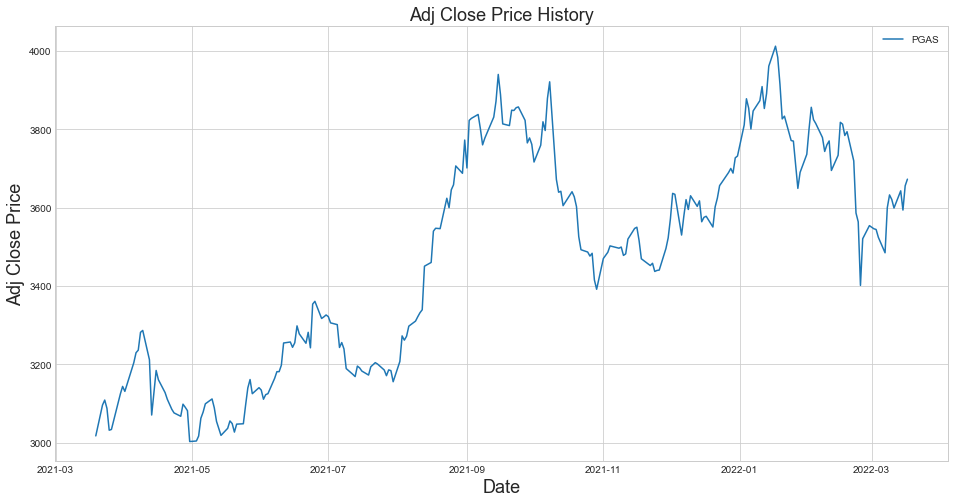

In [10]:
# Visualize the adj close price
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='PGAS')

# Adding text into the visualization
plt.title('Adj Close Price History', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)

# Give legend
plt.legend()

# Show the graph
plt.show()

In [11]:
# Create function for calculating Simple Moving Average (SMA)
def SMA(data, period=30, column='Adj Close'):
    return data[column].rolling(window=period).mean()

In [12]:
# Create two new columns to store the 10 day and 50 day SMA
df['SMA10'] = SMA(df, 10)
df['SMA50'] = SMA(df, 50)

In [13]:
print(df.SMA10[:15])

2021-03-19            NaN
2021-03-22            NaN
2021-03-23            NaN
2021-03-24            NaN
2021-03-25            NaN
2021-03-26            NaN
2021-03-30            NaN
2021-03-31            NaN
2021-04-01            NaN
2021-04-05    3098.121411
2021-04-06    3119.342432
2021-04-07    3133.366113
2021-04-08    3150.654590
2021-04-09    3170.554858
2021-04-12    3188.530859
Name: SMA10, dtype: float64


In [14]:
# Get buy and sell signals
df['Signal'] = np.where(df['SMA10'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()
df['Buy'] = np.where(df['Position'] == 1, df['Adj Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Adj Close'], np.NAN)

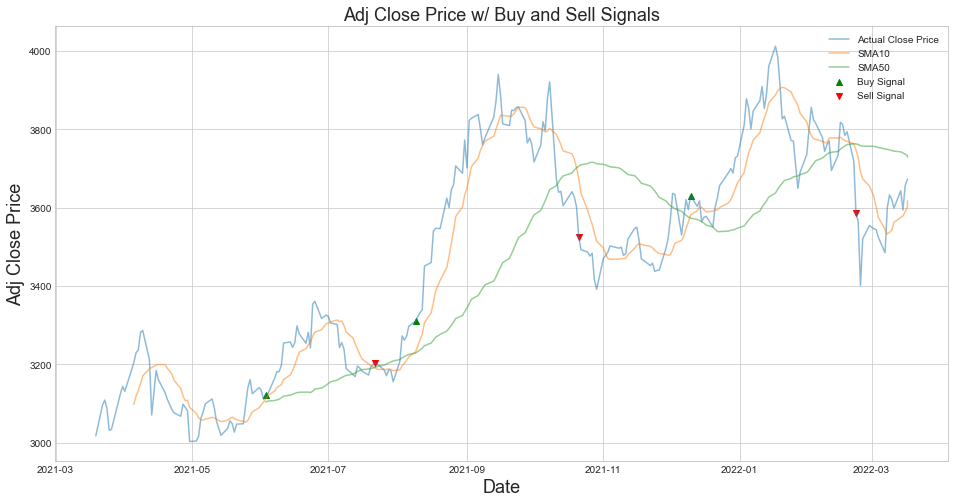

In [15]:
# Visualize the close price with SMA also Buy and Sell Signals
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], alpha=0.5, label='Actual Close Price')
plt.plot(df['SMA10'], alpha=0.5, label='SMA10')
plt.plot(df['SMA50'], alpha=0.5, label='SMA50')

# Make buy or sell signal
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red')

# Adding text into the visualization
plt.title('Adj Close Price w/ Buy and Sell Signals', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)

# Give legend
plt.legend()

# Show the graph
plt.show()

In [16]:
df['Sell'].value_counts()

3526.303711    1
3586.399902    1
3204.559326    1
Name: Sell, dtype: int64

In [17]:
df['Buy'].value_counts()

3630.420654    1
3122.919434    1
3310.519531    1
Name: Buy, dtype: int64

In [18]:
df['Position'].value_counts()

 0.0    241
-1.0      3
 1.0      3
Name: Position, dtype: int64

In [22]:
df['Signal'].value_counts()

1    135
0    113
Name: Signal, dtype: int64

In [23]:
df['SMA10'].value_counts()

3541.235571    1
3774.327930    1
3299.418408    1
3063.682959    1
3468.410352    1
              ..
3387.162451    1
3898.484570    1
3562.609790    1
3074.768335    1
3811.996607    1
Name: SMA10, Length: 239, dtype: int64

In [24]:
df['SMA50'].value_counts()

3715.963652    1
3756.580991    1
3597.363647    1
3709.466938    1
3701.508735    1
              ..
3539.162935    1
3123.664868    1
3393.637217    1
3538.846655    1
3470.765356    1
Name: SMA50, Length: 199, dtype: int64

In [19]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA10', 'SMA50',
       'Signal', 'Position', 'Buy', 'Sell'],
      dtype='object')

In [20]:
df.head(60)

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA50,Signal,Position,Buy,Sell
2021-03-19,3030.000000,3099.000000,3005.000000,3050.199951,3017.639893,5776626,NaN,NaN,0,NaN,NaN,NaN
2021-03-22,3048.699951,3139.449951,3018.649902,3129.649902,3096.241455,2821646,NaN,NaN,0,0.0,NaN,NaN
2021-03-23,3140.000000,3169.000000,3122.850098,3142.600098,3109.053467,3305973,NaN,NaN,0,0.0,NaN,NaN
2021-03-24,3111.199951,3152.300049,3111.149902,3121.100098,3087.782959,2207104,NaN,NaN,0,0.0,NaN,NaN
2021-03-25,3112.199951,3130.850098,3050.000000,3064.850098,3032.133545,3179786,NaN,NaN,0,0.0,NaN,NaN
2021-03-26,3090.649902,3118.000000,3043.050049,3066.800049,3034.062744,3697370,NaN,NaN,0,0.0,NaN,NaN
2021-03-30,3083.000000,3188.449951,3060.899902,3158.550049,3124.833252,4694008,NaN,NaN,0,0.0,NaN,NaN
2021-03-31,3155.000000,3205.000000,3132.000000,3177.850098,3143.927246,3530069,NaN,NaN,0,0.0,NaN,NaN
2021-04-01,3191.100098,3215.000000,3145.000000,3165.000000,3131.214111,4285076,NaN,NaN,0,0.0,NaN,NaN
2021-04-05,3171.000000,3263.000000,3151.000000,3238.899902,3204.325439,5317862,3098.121411,NaN,0,0.0,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2021-03-19 to 2022-03-17
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
 6   SMA10      239 non-null    float64
 7   SMA50      199 non-null    float64
 8   Signal     248 non-null    int32  
 9   Position   247 non-null    float64
 10  Buy        3 non-null      float64
 11  Sell       3 non-null      float64
dtypes: float64(10), int32(1), int64(1)
memory usage: 24.2 KB
